![alt text](Bilder/Logo_HS_Mannheim2.png "Logo")

## Inhalte dieses Kurses

- [Erste Schritte](Erste_Schritte.ipynb)
- [Python installieren und ausführen](Installation.ipynb)


- [Sprint 1: Grundlagen und Numpy](Sprint1.ipynb)
- [Sprint 2: Grafiken mit Matplotlib](Sprint2.ipynb)
- [Sprint 3: Datenanalyse](Sprint3.ipynb)
- [Sprint 4: Sympy](Sprint4.ipynb)
- [Sprint 5: Funktionen](Sprint5.ipynb)
- [Sprint 6: Komplexe Zahlen](Sprint6.ipynb)
- [**Sprint 6extras: Schwingungen und komplexe Zahlen**](Sprint6_Oszillator.ipynb)

# Sprint 6
# Schwingungen und komplexe Zahlen

In diesem Sprint lösen wir die Bewegungsgleichungen des harmonischen und gedämpften Oszillators mithilfe von `sympy`. 
Danach zeigen wir Ihnen, wie man Schwingungen mit komplexen Zahlen darstellen kann.  
Hier haben wir keine besonderen Aufgaben für Sie vorgesehen. Wir ermutigen Sie, mit den Daten zu spielen und Änderungen zu beobachten, wenn diverse Parameter variiert werden. 

In [1]:
# wie immer:

%matplotlib notebook 
import matplotlib.pyplot as plt 
from matplotlib import animation  # für Animationen  

# numpy importieren
import numpy as np

# sympy importieren
import sympy as sy

## 1. Harmonischer Oszillator (HO)
### Lösung der Bewegungsgeichung

   
Allgemein haben wir eine Bewegungsgleichung zu lösen:    

\begin{aligned}
m\frac{d^2x}{dt^2}+kx=0 
\end{aligned}    

Wir berücksichtigen, dass $\omega_0=\sqrt{\frac{k}{m}}$ gilt: 

\begin{aligned}
\frac{d^2x}{dt^2}+\omega^2 x=0 
\end{aligned}    

Wir lösen diese Gleichung mit Hilfe von `sympy`, das wir Ihnen näher in [Sprint4](Sprint4.ipynb) vorgestellt haben. In [diesem Video](https://www.youtube.com/watch?v=3-9Ys1_EwwU) können Sie erfahren, wie man in `sympy` allgemein eine Bewegungsgleichung lösen kann.   

In [2]:
# Symbole definieren
t = sy.symbols('t', real=True)
w0 = sy.symbols('\omega_0 ', real=True, positive=True)

# Funktion Z_HO definieren
Z_HO = sy.Function('Z_HO')

# Terme der Gleichung geben
Term1=sy.diff(Z_HO(t),t,2)
Term2=w0**2*Z_HO(t)

Eine Bewegungsgleichung löst man in `sympy` mit der Methode `dsolve`:

In [3]:
z_los_HO=sy.dsolve(Term1+Term2) #z_los_HO: Lösung der Bewegungsgleichung des harmonischen Oszillators
z_los_HO

Eq(Z_HO(t), C1*sin(\omega_0*t) + C2*cos(\omega_0*t))

Jetzt müssen noch Konstanten $C_1$ und $C_2$ anhand der Anfangsbedingungen für $ \ \ t=0: \ \ Z_{HO}(0)=z_0 \ \ $ und $ \ \ Z_{HO}'(0)=v_0 \ \ $ bestimmt werden.  
Dazu müssen wir   
- die rechte Seite (`rhs`-Funktion) der obigen Gleichung für t=0 gleich $z_0$ setzen
- die Ableitung der rechten Seite für t=0 gleich $v_0$ setzen

und beide Geichungen lösen

In [4]:
# Symbole z0, v0 definieren
z0, v0 = sy.symbols('z0 v0', real=True)
# Gleichungssystem definieren
equations = [
    sy.Eq(z_los_HO.rhs.subs(t,0).evalf(), z0),# t->0 ersetzen in der rhs (right-hand-side), rechten Seite der Lösung 
    sy.Eq(sy.diff(z_los_HO.rhs,t).subs(t,0).evalf(), v0 )
]
# Gleichungssystem lösen lassen
Konstanten_HO=sy.solve(equations)
# Konstanten in der Lösung einsetzen
z_los_HO_full=z_los_HO.subs(Konstanten_HO[0]).evalf() #z_los_HO_full: vollständige Lösung
z_los_HO_full

Eq(Z_HO(t), z0*cos(\omega_0*t) + v0*sin(\omega_0*t)/\omega_0)

### Berechnung der Geschwindigkeit und Beschleunigung

Als Lösung der Bewegungsgleichung haben wir den Ort (die Position) des harmonischen Oszillators als Funktion der Zeit erhalten.    
Jetzt möchten wir noch die Geschwindigkeit und Beschleunigung bestimmen. Diese Funktionen erhalten wir durch Ableiten der Lösungen nach Zeit:  

$v_{HO}(t)=Z_{HO}'(t) \ \ $ und $ \ \ a_{HO}(t)=v_{HO}'(t)$, 

wozu wir wieder die Methode `sy.diff` benutzen werden:

In [5]:
# Geschwindigkeit, als Ableitung der rechten Seite der letzten Gleichung nach Zeit
v_HO=sy.diff(z_los_HO_full.rhs,t)
v_HO

-\omega_0*z0*sin(\omega_0*t) + v0*cos(\omega_0*t)

In [6]:
# Beschleunigung, als Ableitung der Geschwindigkeit
a_HO=sy.diff(v_HO,t)
a_HO

-\omega_0**2*z0*cos(\omega_0*t) - \omega_0*v0*sin(\omega_0*t)

### Graphische Darstellung der Lösung

**Ihre Aufgabe:**
Versuchen Sie die angegebenen Parameter zu ändern und beobachten Sie dabei Änderungen in den Grafiken unten.    

*Hinweis: $v_{0_{HO}}$ und $z_{0_{HO}}$ können auch negative Werte annehmen*
      
- welche Werte haben Geschwindigkeit und Beschleunigung bei maximaler Auslenkung und bei Auslenkung=0?
- wie ist die Phase der Beschleunigung im Vergleich zur Ortsphase? (siehe auch die letzten Gleichungen)

<IPython.core.display.Javascript object>


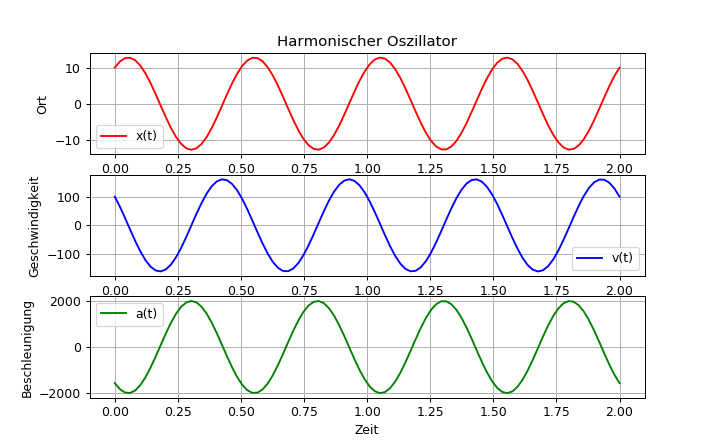

In [7]:
# konkrete Zahlen, um Schwingungen zu plotten:
omega_HO=2*2*sy.pi                # Kreisfrequenz 
v0_HO=100                         # v0 Wert
z0_HO=10                          # z0 Wert
tt=np.linspace(0,2,100)           # Zeitbereich tt zum Zeichnen 

# Symbole w0,v0, z0 durch Zahlen ersetzen
z_HO_t=z_los_HO_full.rhs.subs({w0: omega_HO, v0: v0_HO, z0: z0_HO}).evalf()

# Ort
z_HO_tt=[z_HO_t.subs({t: tn}).evalf() for tn in tt] # Symbol t durch Werte aus dem Zeitbereich tt ersetzen
# Geschwindigkeit 
v_HO_tt=[sy.diff(z_HO_t,t).subs({t: tn}).evalf() for tn in tt]
# Beschlenigung 
a_HO_tt=[sy.diff(z_HO_t,t,2).subs({t: tn}).evalf() for tn in tt]

#plt.figure() # neues Fenster, IMMER ein mal für eine neue interaktive Grafik 

f,ax=plt.subplots(3,1,figsize=(8,5))

# Ort
ax[0].plot(tt, z_HO_tt, 'r',label='x(t)') 
ax[0].set_title('Harmonischer Oszillator')     # fügt Titel ein   
ax[0].legend();               # fügt die Legende ein
ax[0].set_ylabel('Ort') # fügt y-Achsenbeschriftung ein  
ax[0].grid()             

# Geschwindigkeit
ax[1].plot(tt, v_HO_tt, 'b',label='v(t)') 
ax[1].legend();               # fügt die Legende ein
ax[1].set_ylabel('Geschwindigkeit') # fügt y-Achsenbeschriftung ein  
ax[1].grid() 

# Beschleunigung
ax[2].plot(tt, a_HO_tt, 'g',label='a(t)') 
ax[2].legend()               # fügt die Legende ein
ax[2].set_ylabel('Beschleunigung') #fügt y-Achsenbeschriftung ein
ax[2].grid() 

ax[2].set_xlabel('Zeit'); #fügt x-Achsenbeschriftung ein

## 2. Gedämpfter Oszillator (GO)

### Lösung der Bewegungsgeichung

Allgemein haben wir eine Bewegungsgleichung zu lösen:    

\begin{aligned}
m\frac{d^2x}{dt_2}=−kx−\delta\frac{dx}{dt} 
\end{aligned}

Wir berücksichtigen, dass im Fall $\delta$=0 (ungedämpfe Schwingungen) $\omega_0=\sqrt{\frac{k}{m}}$ gilt. Weiterhin setzen wir $\frac{\delta}{2m}=b$: 

\begin{aligned}
\frac{d^2x}{dt^2}+\omega_0^2 x + 2 b \frac{dx}{dt} = 0 
\end{aligned}

Wir lösen die Bewegungsgleichung und plotten Lösungen für    
a) schwach gedämpfte Schwingungen $\omega_0>b$    
b) stark gedämpfte Schwingungen $\omega_0<b$ 

In [8]:
# Symbole definieren
t = sy.symbols('t', real=True)
w0, b = sy.symbols('\omega_0 b', real=True, positive=True)
# Funktion Z_GO definieren
Z_GO = sy.Function('Z_GO')
# Terme der Gleichung definieren
Term1=sy.diff(Z_GO(t),t,2)
Term2=w0**2*Z_GO(t)
Term3=2*b*sy.diff(Z_GO(t),t)
# Bewegungsgleichung mit 'dsolve' lösen
z_los_GO=sy.dsolve(Term1+Term2+Term3) #z_los_GO: Lösung
z_los_GO

Eq(Z_GO(t), C1*exp(t*(-b - sqrt(-\omega_0 + b)*sqrt(\omega_0 + b))) + C2*exp(t*(-b + sqrt(-\omega_0 + b)*sqrt(\omega_0 + b))))

Konstanten $C_1$ und $C_2$ anhand der Anfangsbedingungen für $ \ \ t=0: \ \ Z_{GO}(0)=z_0 \ \ $ und $ \ \ Z_{GO}'(0)=v_0 \ \ $ bestimmen.  

In [9]:
# Symbole z0, v0 definieren
z0, v0 = sy.symbols('z0 v0',real=True)
# Gleichungssystem definieren
equations = [
    sy.Eq(z_los_GO.rhs.subs(t,0).evalf(), z0),# t->0 ersetzen in der rhs (right-hand-side), rechten Seite der Lösung 
    sy.Eq(sy.diff(z_los_GO.rhs,t).subs(t,0).evalf(), v0 )
]
#Gleichungssystem lösen lassen
Konstanten_GO=sy.solve(equations)
# Konstanten in der z_los_GO Lösung einsetzen
z_los_GO_full=z_los_GO.subs(Konstanten_GO[0]).evalf() #z_los_GO_full: vollständige Lösung
z_los_GO_full

Eq(Z_GO(t), 0.5*(-\omega_0**2 + b**2)**(-0.5)*(-b*z0 - v0 + z0*(-\omega_0**2 + b**2)**0.5)*exp(t*(-b - sqrt(-\omega_0 + b)*sqrt(\omega_0 + b))) + 0.5*(-\omega_0**2 + b**2)**(-0.5)*(b*z0 + v0 + z0*(-\omega_0**2 + b**2)**0.5)*exp(t*(-b + sqrt(-\omega_0 + b)*sqrt(\omega_0 + b))))

<font color='blue'> 
### Keine Dämpfung, b=0: 
### ist diese Lösung der Lösung des 1.harmonischen Oszillators gleich? </font>

In [10]:
z_los_GO_full.subs(b,0).evalf()

Eq(Z_GO(t), -0.5*I*\omega_0**(-1.0)*(1.0*I*\omega_0**1.0*z0 - v0)*exp(-I*\omega_0*t) - 0.5*I*\omega_0**(-1.0)*(1.0*I*\omega_0**1.0*z0 + v0)*exp(I*\omega_0*t))

<div class="pull-left"> 
<img src="Bilder/Achtung_schild.png" width="50">   
</div>  

`sympy` liefert uns für Dämpfung b=0 eine komplexe Lösung. 

Es liegt daran, dass in der allgemeinen Lösung $Z_{GO} (t)$ 
 ein $\sqrt{-\smash{w_0}^2 + b^2}$ - Faktor vorkommt. Der ist für schwache oder keine Dämpfung rein imäginar. Wie man diese komplexe Lösung umwandelt und daraus doch eine reelle Lösung bekommt, lernen Sie im ca.3.ten Semester oder, wenn Sie Lust haben, öffnen Sie mit Doppelklick diese notebook-Zelle, entfernen Sie unten `<!--` und `-->`, und drücken Strg-Enter um diese Zelle auszuführen.

Da die Lösung für alle Fälle im Endeffekt reell ist, können wir jetzt schon den Realteil der Lösung nehmen.   
Für $b=0$ erhalten wir zu unserer Erleichtung die gleiche Lösung, wie oben beim harmonischen Oszillator $Z_{HO} (t)$: 
 
<!--
Wir ersetzen für schwäche Dämpfung den rein imäginaren Faktor $\sqrt{b^2 - \smash{w_0}^2}$ in der $Z_{GO}(t)$ Lösung mit 

\begin{array}{cclcl}
\sqrt{b^2 - \smash{w_0}^2} = i \cdot \sqrt{\smash{w_0}^2 - b^2} =: i \cdot \smash{w}_G, 
\end{array}

wo $w_G$ die Kreisfrequenz des schwachgedämpften Oszillators ist.

Weiterhin sortieren wir die $Z_{GO}(t)$ Lösung nach gemeinsammen Amplituden, statt nach exponentiellen Faktoren:

\begin{array}{cclcl}
z_{GO} = \frac{b  z_0 + v_0}{\smash{w_G} }\cdot  e^{-bt} \cdot \frac{e^{i \smash{w_G}\cdot t} - e^{-i \smash{w_G}\cdot t}}{2 i} + z_0 \cdot e^{-bt} \cdot \frac{e^{i \smash{w_G} \cdot t} + e^{-i \smash{w_G} \cdot t}}{2}       
\end{array}

und machen Gebrauch von der Umwandlung der komplexen Zahlen, aus der Exponential- in die Polarform (6.Booklet in Mathe, Aufgabe 15):

\begin{array}{cclcl}
z_{GO} =  (b  z_0 + v_0) \cdot e^{-bt} \cdot \frac{\sin(\smash{w_G} t)}{\smash{w_G}} +
     z_0 \cdot e^{-bt} \cdot \cos(\smash{w_G} t) 
\end{array}

Mit der kleinen Hilfe von komplexen Zahlen haben wir unsere reale Lösung gefunden. Wie bei dem harmonischen Oszillator, besteht sie aus zwei Schwingungen ($\sin(\smash{w_G} t)$ und $\cos(\smash{w_G} t) $). Amplitude beider Schwingungen klingt exponentiell mit der Zeit ab ($e^{-bt}$). 
-->

In [11]:
sy.re(z_los_GO_full.rhs).subs(b,0).evalf()#) 

1.0*\omega_0**(-1.0)*v0*sin(\omega_0*t) + 1.0*z0*cos(\omega_0*t)

### Graphische Darstellung der Lösung

**Ihre Aufgabe:**
Versuchen Sie die oben angegebenen Parameter zu ändern und beobachten Sie dabei Änderungen in den Grafiken unten.    

a) gar nicht gedämpfter Oszillator $b=0$    
b) schwach gedämpfter Oszillator $\omega_0>b$    
c) stark gedämpfter Oszillator $\omega_0<b$ 

<IPython.core.display.Javascript object>


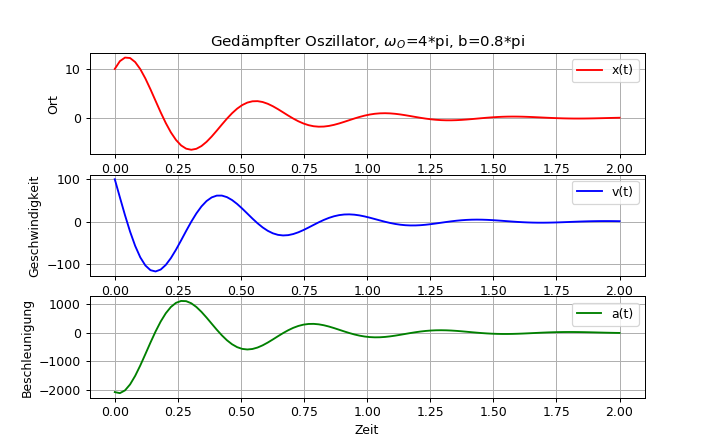

In [12]:
# konkrete Zahlen, um Schwingungen zu plotten:
omega_GO=2*2*sy.pi                # Kreisfrequenz 
v0_GO=100                         # v0 -Wert
z0_GO=10                          # z0 -Wert
tt_GO=np.linspace(0,2,100)        # Zeitbereich tt zum Zeichnen definieren 

# Dämpfungsterm
#b0=0             # keine Dämpfung
b0=.2*omega_GO   # schwache Dämpfung
#b0=1.1*omega_GO  # starke Dämpfung

# Realteil der Lösung nehmen, Symbole w0, b, v0, z0 durch Zahlen ersetzen 
z_GO_t=sy.re(z_los_GO_full.rhs).subs({w0: omega_GO, b: b0, v0: v0_HO, z0: z0_GO}).evalf()

# Ort
z_GO_tt=[z_GO_t.subs({t: tn}).evalf() for tn in tt_GO]# Symbol t durch Werte aus dem Zeitbereich tt_GO ersetzen
# Geschwindigkeit 
v_GO_tt=[sy.diff(z_GO_t,t).subs({t: tn}).evalf() for tn in tt_GO]
# Beschlenigung 
a_GO_tt=[sy.diff(z_GO_t,t,2).subs({t: tn}).evalf() for tn in tt_GO]

#plt.figure() # neues Fenster, IMMER ein mal für eine neue interaktive Grafik 

f,ax=plt.subplots(3,1,figsize=(8,5))

# Ort
ax[0].plot(tt_GO, z_GO_tt, 'r',label='x(t)') 
ax[0].set_title('Gedämpfter Oszillator, ' +'$\omega_O$=' + str(omega_GO) + ', ' + 'b=' + str(b0) )#Titel   
ax[0].legend();               # fügt die Legende ein
ax[0].set_ylabel('Ort')       # fügt y-Achsenbeschriftung ein  
ax[0].grid()             

# Geschwindigkeit
ax[1].plot(tt_GO, v_GO_tt, 'b',label='v(t)') 
ax[1].legend();                     # fügt die Legende ein
ax[1].set_ylabel('Geschwindigkeit') # fügt y-Achsenbeschriftung ein  
ax[1].grid() 

# Beschleunigung
ax[2].plot(tt_GO, a_GO_tt, 'g',label='a(t)') 
ax[2].legend()                     # fügt die Legende ein
ax[2].set_ylabel('Beschleunigung') # fügt y-Achsenbeschriftung ein
ax[2].grid() 

ax[2].set_xlabel('Zeit');          # fügt x-Achsenbeschriftung ein

## 3. Schwingungen gleicher Frequenz mit Hilfe von komplexen Zahlen überlagern 

Reale Schwingungen haben mit komplexen Zahlen auf dem erstem Blick nichts gemeinsames. Nichtsdestotrotz vereinfachen komplexe Zahlen manche Berechnungen und ermöglichen einfache Interpretation und graphische Darstellung der Schwingungen, wie wir Ihnen hier zeigen werden. 

<div class="pull-right"> 
<img src="Bilder/Summe_z_Vektoren.jpg" width="700">
</div>  

<br>
<br>
<br>


<div class="alert alert-block alert-info"> 
Komplexe Zahlen, die Schwingungen repräsentieren ($z_1, z_2, ...$ und ihre Summe $z_{sum}$), kann man in der Gaußschen Ebene als rotierende Vektoren darstellen.
</div>   

<div class="alert alert-block alert-info"><b></b>     
Die eigentliche Schwingung (der Realteil) wird als zeitabhägige Projektion auf die reelle Achse dargestellt. <i>Damit das Bild komplett wird, projizieren wir auch den Imaginärteil auf die imaginäre Achse.</i>
</div>

<div class="alert alert-block alert-info"> 
Aus einer Kombination von $\sin(\omega t)$ und $\cos (\omega t)$ kann man eine beliebige Schwingung mit der Kreisfrequenz $\omega$  erzeugen. 
    
$\sin(\omega t)$ und $\cos (\omega t)$ sind sozusagen wie $x$ und $y$ Vektoren im Kartesischen Koordinatensystem, aus denen Kombination man einen beliebigen Vektor in der $xy$-Ebene erstellen kann. 
    
Am einfachsten sieht man die Parallele in der Gaußschen Ebene. 
</div>    

### Überlagerung zweier Schwingungen gleicher Frequenz und Richtung   (wie in [wikibooks](https://de.wikibooks.org/wiki/Komplexe_Zahlen/_Anwendung_in_der_klassischen_Physik))

Die beiden Schwingungen lauten: 

\begin{aligned}
x_1\;&=\;a_1\,\cos(\omega t+\varphi_1)\\
x_2\;&=\;a_2\,\cos(\omega t+\varphi_2)
\end{aligned}

Die Summe $x = x_1 + x_2$ wird wir nicht mithilfe von Additionstheoremen berechnet, sondern mit komplexen Zahlen. 

Die Schwingungen $x_1$ und $x_2$ sind Realteile der komplexen Formen 

\begin{array}{cclcl}
    x_1&\to & z_1\;=\;a_1\mathrm {e} ^{\mathrm {i} \,(\omega t +\varphi_1)}\\
    x_2&\to & z_2\;=\;a_2\mathrm {e} ^{\mathrm {i} \,(\omega t +\varphi_2)}  
\end{array}

Die resultierende Schwingung lautet:

\begin{aligned}
z\;=\;z_1+z_2\;=\;(a_1\,\mathrm {e} ^{\mathrm {i} \,\varphi_1}+a_2\,\mathrm {e} ^{\mathrm {i} \,\varphi_2})\cdot \mathrm {e} ^{\mathrm {i} \,\omega t}\;:=\;z_0\,\cdot \mathrm {e} ^{\mathrm {i} \,\omega t}\;=\;|z_0|\,\cdot \mathrm {e} ^{\mathrm {i} \,(\omega t + \varphi_0)}\;
\end{aligned}

wo $z_0$ eine komplexe Amplitude ist, ${\displaystyle z_0\;=\;|z_{0}| \cdot \mathrm {e} ^{\mathrm {i} \,\varphi_0} }$. 


$z_0$ ausgeschrieben aus der Polarform <font size="1"> ($e^{i\,\varphi}=\cos\varphi + i \sin\varphi $) </font> : 

\begin{aligned}
z_0\;=\;(a_1\cos\varphi_1 + a_2\cos\varphi_2) + \mathrm {i} \,(a_1\sin\varphi_1 + a_2\sin\varphi_2)\;:=\;C+\mathrm {i} \,S 
\end{aligned}

Hierin bedeuten (C für cos-Terme, S für sin-Terme):

\begin{aligned}
C\;=\; a_1\cos\varphi_1 + a_2\cos\varphi_2 \\
S\;=\; a_1\sin\varphi_1 + a_2\sin\varphi_2
\end{aligned}

Die Amplitude der resultierenden Schwingung lautet:

${\displaystyle |z_{0}|\;=\;\sqrt{C^2+S^2} }$

Die Phase ergibt sich aus ${\displaystyle \;\tan {\varphi_0}={\tfrac{S}{C}}\!}$.

Uns interessiert der Realteil der resultierenden Schwingung, da $x=x_1+x_2=Re(z_1)+Re(z_2)=Re(z)$, i.e. ${\displaystyle \;x=|z_{0}|\cos(\omega t+\varphi_0)}$. 

$x$  hat dieselbe Richtung und dieselbe Frequenz, wie die Ausgangsschwingungen. 

Hier ein Beispiel, wie man mit `sympy` solche Überlagerung der Schwingungen darstellen kann.

In [13]:
# Amplituden und Phasen der beiden Schwingungen
a1=10                       # Amplitude der ersten Schwingung
phi1=0                      # Phase der ersten Schwingung
a2=10                       # Amplitude der zweiten Schwingung
phi2= sy.pi/2               # Phase der zweiten Schwingung

# Symbole für komplexe Schwingungen definieren: Amplitude a, Phase phi, Kreisfrequenz w, Zeit t
a, phi, w, t=sy.symbols('a phi \omega t', real=True) # es sollen reelle Zahlen sein, daher die Option real=True 

# Allgemein: Schwingung in komplexer Exponentialform 
z_sy=a*sy.exp(sy.I*(w*t+phi))     

z1=z_sy.subs(({a: a1, phi: phi1})).evalf()# erste Schwingung: a wird durch a1 ersetzt, und phi durch phi1
z2=z_sy.subs(({a: a2, phi: phi2})).evalf()# zweite Schwingung: a->a2, phi->phi2  

sy.simplify(z1+z2)    # Komplexe Summe der Schwingungen 


10.0*(1 + I)*exp(I*\omega*t)

In [14]:
sy.simplify(sy.re(z1+z2))    # Realteil der Summe der Schwingungen 

10.0*sqrt(2)*cos(\omega*t + pi/4)

### Graphische Darstellung der Schwingungen

Graphisch kann man komplexe Zahlen, die Schwingungen repräsentieren (z1, z2, ... und ihre Summe), in der Gaußschen Ebene als rotierende Vektoren darstellen, da ihr Argument eine lineare Funktion der Zeit ist. Die Überlagerung zweier Schwingungen wird als vektorielle Summe der Summanden dargestellt.
   
Der Realteil der Schwingungen (die eigentliche Schwingung) wird als zeitabhägige Projektion auf der reellen Achse dargestellt. Damit das Bild komplett wird, projizieren wir auch den imaginären Teil auf die imaginäre Achse.
     

Um nicht jedes mal die Grafik neu schreiben zu müssen, haben wir einmal unsere Grafik-Funktion `male_Schwingungen_z_und_y_von_t` definiert. Dieser Funktion übergeben wir als Argumente unsere komplexen Zahlen, Zeit-Skala und den Titel des Graphen. Diese erzeugen wir mit der Funktion `erzeuge_z_Vektoren_und_Summe` aus gegebenen Kreisfrequenzen, Amplituden und Phasen, gegebener Zeitskala. 
Unsere Grafik-Funktion gibt wiederum Werte zurück, die man als input-Argumente in der `matplotlib animation`-Bibliothek eingebauten `FuncAnimation`-Funktion verwenden kann.  

All diese Funktionen müssen Sie nicht kennen. Betrachten Sie diese als Geschenk für das Corona-Semester. :)
Falls Sie doch sehen wollen, wie die Funktionen aussehen, klicken Sie [hier](Functions4animatedKomplexNumbers.ipynb).  

Um Funktionen, die in einem anderen Notebook definiert sind, zu benutzen, müssen wir dieses Notebook mit dem `%run` Befehl ausführen:    

In [24]:
%run Functions4animatedKomplexOscillations.ipynb

In [25]:
# konkrete Zahlen, um Schwingungen zu plotten. Damit wir beliebig viele Schwingungen addieren können, 
# schreiben wir ihre Parameter (Amplitude usw.) als python-Listen in Klammern [] 
omega=[2*2*sy.pi,2*2*sy.pi]      # Kreisfrequenz, gleich für beide Schwingungen
amp  = [10, 5]                   # Amplitude der ersten, zweiten, etc. Schwingung
phase= [0, sy.pi/2]              # Phase der ersten, zweiten, etc. Schwingung
T=np.linspace(0,2,100)           # Zeitbereich T zum Zeichnen definieren
Titel='2 z-Vektoren und ihre Summe in Gauß-Ebene'   

<IPython.core.display.Javascript object>


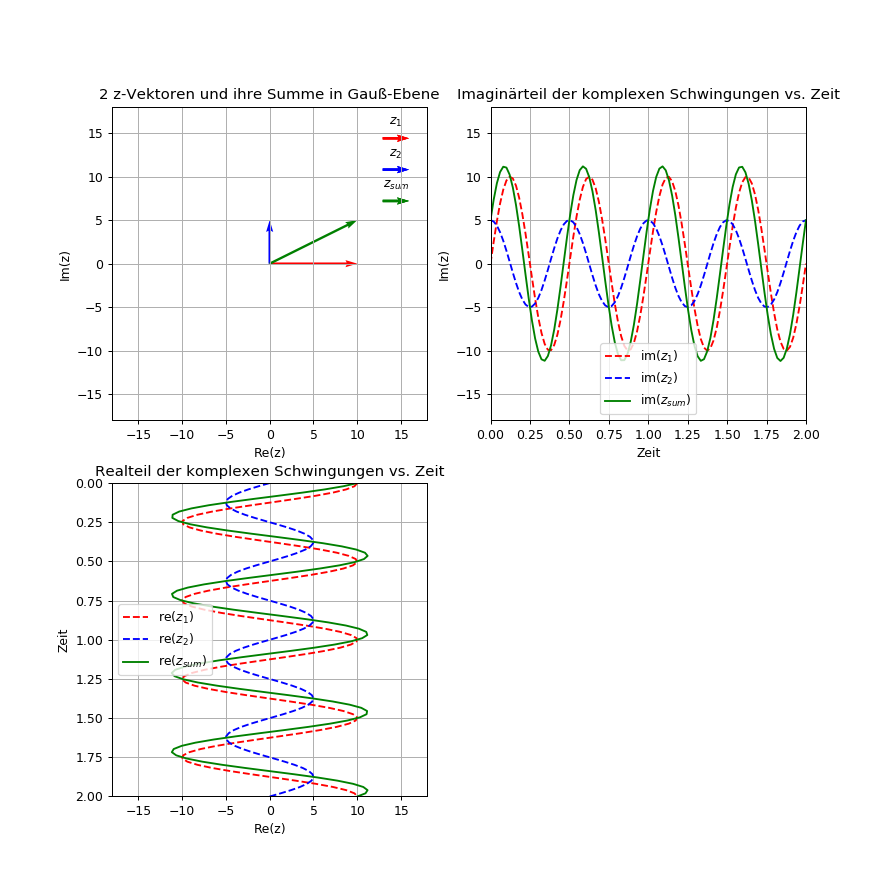

In [26]:
# unsere Funktionen aus dem Functions4animatedKomplexOscillations.ipynb-Notebook anwenden:
z_all=erzeuge_z_Vektoren_und_Summe(omega, amp, phase, T)
Q, X, Y, fig01, line1, line2, x, y, zeit = male_Schwingungen_z_und_y_von_t(z_all,T,Titel)
Intervall=80 # in [ms]: wie schnell soll die Grafik aktualisiert werden
anim = animation.FuncAnimation(fig01, update_quiver_and_line, fargs=(Q, X, Y, z_all, zeit, 
                                                                     x, y, line1, line2, T),
                               interval=Intervall, blit=True)
